In [12]:
import pandas as pd
import seaborn as sns
import numpy as np

penguins = pd.read_csv('../datasets/penguins.csv')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [17]:
import numpy as np

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


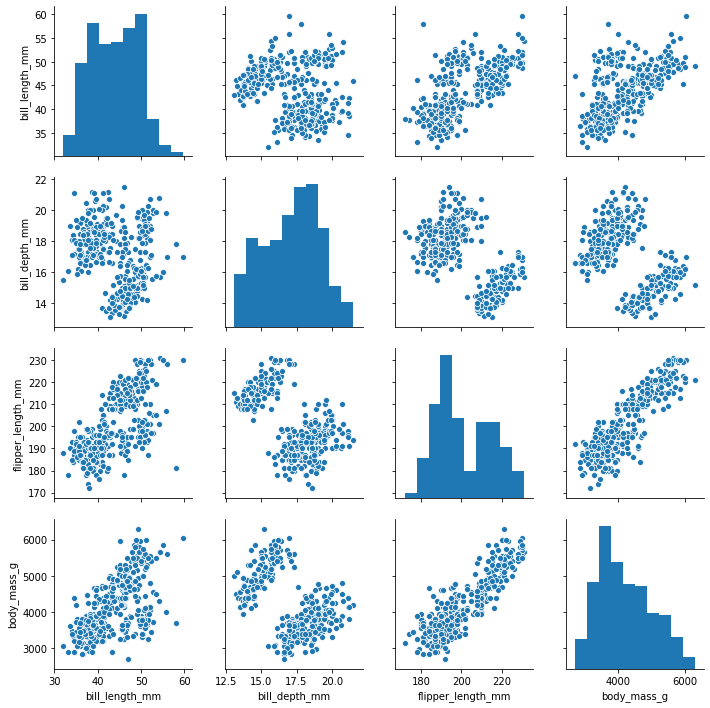

In [6]:
sns.pairplot(data = penguins)

In [16]:
# Median imputation
# http://joshlawman.com/dealing-with-missing-data-imputation-with-pandas/

penguins['body_mass_g_impute'] = penguins['body_mass_g'].fillna(penguins['body_mass_g'].median(), inplace=True)

In [7]:
# scikit learn iterative imputation
# https://andymdc31.github.io/missing_data_and_using_sklearns_iterativeimputer

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer(max_iter=10, verbose=0)

In [9]:
# penguins = penguins[['flipper_length_mm', 'body_mass_g']]

imp.fit(penguins)
imputed_penguins = imp.transform(penguins)
imputed_penguins = pd.DataFrame(imputed_penguins, columns=penguins.columns)

In [14]:
# https://stackoverflow.com/questions/25039626/how-do-i-find-numeric-columns-in-pandas#28155580

imp.fit(penguins.select_dtypes(include=np.number))
imputed_penguins = imp.transform(penguins.select_dtypes(include=np.number))
imputed_penguins = pd.DataFrame(imputed_penguins, columns=penguins.select_dtypes(include=np.number).columns)

In [15]:
imputed_penguins

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.10000,18.70000,181.000000,3750.000000
1,39.50000,17.40000,186.000000,3800.000000
2,40.30000,18.00000,195.000000,3250.000000
3,43.92193,17.15117,200.915205,4201.754386
4,36.70000,19.30000,193.000000,3450.000000
...,...,...,...,...
339,43.92193,17.15117,200.915205,4201.754386
340,46.80000,14.30000,215.000000,4850.000000
341,50.40000,15.70000,222.000000,5750.000000
342,45.20000,14.80000,212.000000,5200.000000


In [ ]:
# https://community.powerbi.com/t5/Desktop/Power-BI-Python-with-Anaconda-missing-dependency/m-p/665102